In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/home/albert/Work/git/cmclimate")
import cmclimate
import os
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

sys.path.insert(0,'/home/albert//Work/git/CMEMS-diags/')
from natl60_3_5_by_5_boxes import boxes
sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
import plot_box as pb


In [2]:
ds_natl_T = xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d01-y2013m09d30.1d_hgradT_large-n80-f0.1.nc',chunks={'time_counter':1})
ds_natl_S = xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d01-y2013m09d30.1d_hgradS_large-n80-f0.1.nc',chunks={'time_counter':1})
ds_natl_b = xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d01-y2013m09d30.1d_hgradb_large-n80-f0.1.nc',chunks={'time_counter':1})


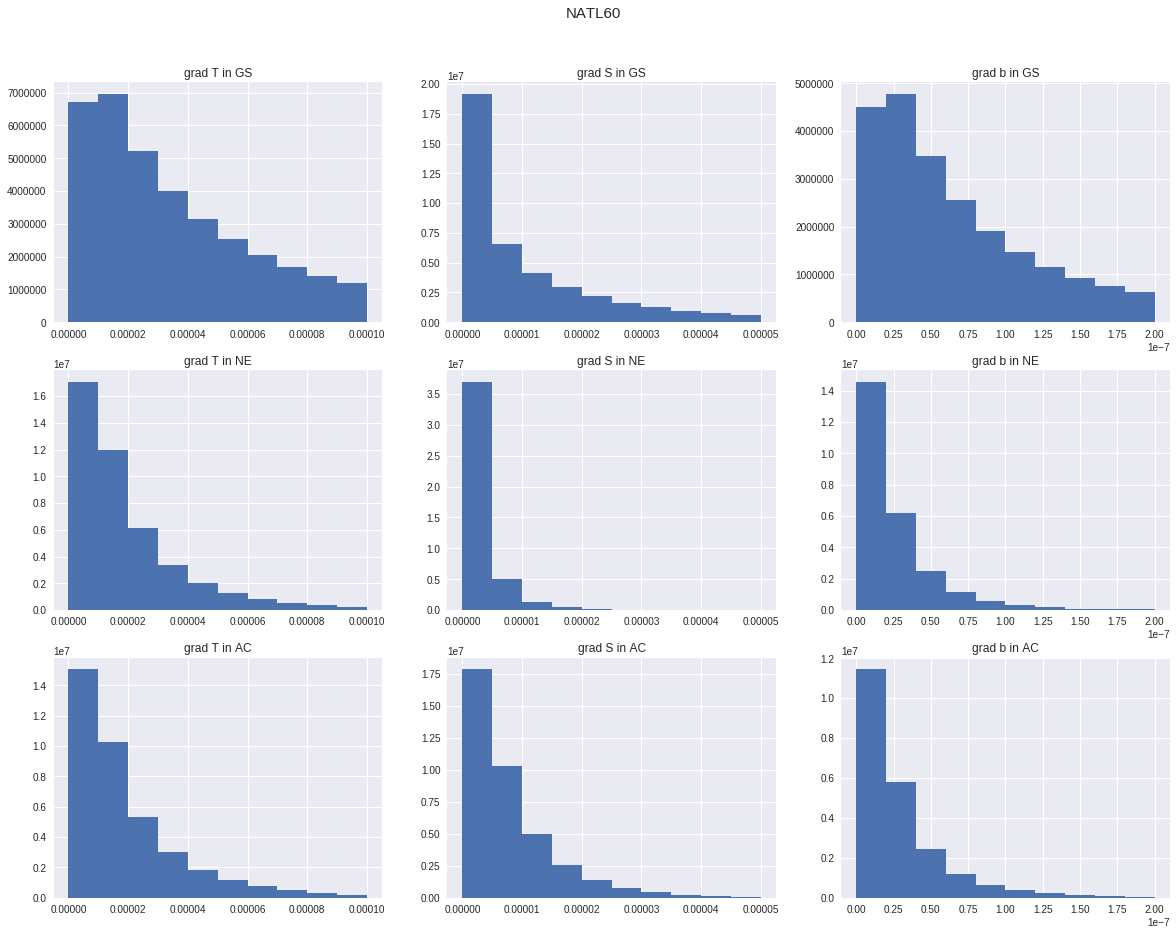

In [12]:
fig = plt.figure(figsize=(20.0, 15.0))

for box in boxes:
    
    gradT=ds_natl_T['vohgradb'][:,box.jmin:box.jmax,box.imin:box.imax].stack(z=('x', 'y','time_counter'))
    gradS=ds_natl_S['vohgradb'][:,box.jmin:box.jmax,box.imin:box.imax].stack(z=('x', 'y','time_counter'))
    gradb=ds_natl_b['vohgradb'][:,box.jmin:box.jmax,box.imin:box.imax].stack(z=('x', 'y','time_counter'))
    
    gradT_nonan=gradT[~np.isnan(gradT)]
    gradS_nonan=gradS[~np.isnan(gradS)]
    gradb_nonan=gradb[~np.isnan(gradb)]
    
    axes1 = fig.add_subplot(3, 3, (box.nb-1)*3+1)
    axes1.hist(gradT_nonan,range=(0,1e-4),color='b')
    plt.title('grad T in '+box.name)

    axes2 = fig.add_subplot(3, 3, (box.nb-1)*3+2)
    axes2.hist(gradS_nonan,range=(0,5e-5),color='b')
    plt.title('grad S in '+box.name)

    axes3 = fig.add_subplot(3, 3, (box.nb-1)*3+3)
    axes3.hist(gradb_nonan,range=(0,2e-7),color='b')
    plt.title('grad b in '+box.name)

plt.suptitle('NATL60',x=0.5,y=0.95,fontsize=15)
    
    
#fig.tight_layout()
plt.savefig('hist_grad_natl60.png')